<a href="https://colab.research.google.com/github/SatyaanikaPandam/Data-Science/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Including a polynomial element in a model helps capture nonlinear relationships making it more flexible and accurate. While linear models work for simple patterns, real world data is often more complex and curved.Polynomials allow the model to fiit these curves, improving its ability to represent the data. This flexibility helps when dealing with nonlinear trends, making the model more useful for real scenarios.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Using polynomials in a model comes with risks, like overfitting, like when the power increases. Overfittting makes the model too focused on the training data, so it struggles to work well with neww data. It can also make predictions unpredictable, leading to extreme values. ALso, the more complex the model gets, the harder it is to understand and interpret, which can make it less useful.

**Task3**:

What's the point of using b splines?

b splines are great for modeling nonlinear relationships without the risk of overfitting that comes with polynomials. They offer more flexibility while avoiding issues like weird oscillations (Runge's phenomenon). Also, they’re more efficeient because they work over smaller sections of data instead of the entire range.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a model that looks at the relationships between points instead of just the points themsellves. It learns from the data without needing prior knowledge and updates as more data is given. This makes it useful for small datasets since it can adapt and improve its understanding.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [1]:
!pip install preliz
!pip install bambi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 748.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.3 MB/s eta 0:00:00


In [2]:
import preliz as pz
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

In [3]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

In [4]:
#degree 2 polynomial model
model_poly_2 = bmb.Model("weight ~ poly(height, degree=2)", howell)
idata_poly_2 = model_poly_2.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


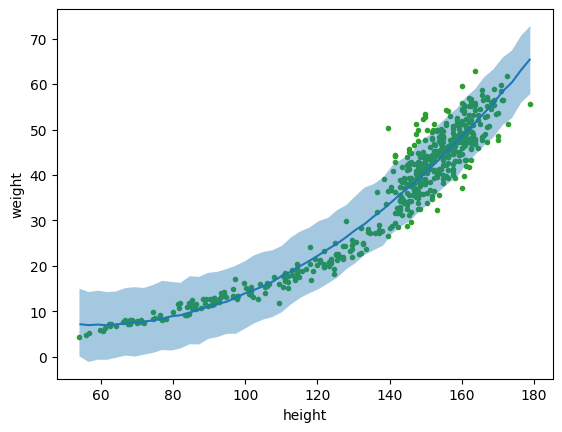

In [5]:
bmb.interpret.plot_predictions(model_poly_2, idata_poly_2, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

<Axes: xlabel='weight'>

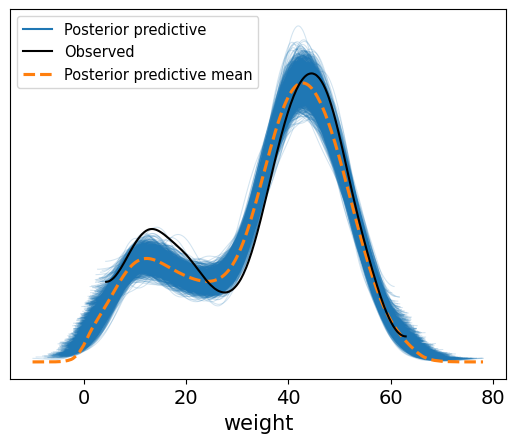

In [6]:
model_poly_2.predict(idata_poly_2, kind="response")
az.plot_ppc(idata_poly_2)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

From reading the article, I learned that Gaussian Process models can incorporate custom covariance functions to better captuire underlying trends in data. They can handle uncertainty in input locations and model time depiendent changes effectively.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

The graph for the semiparametric GP model is really interesting because it combines CO2 measurements with recent data, giving us a clearer picture of CO2 levels in the atmomsphere. Its great for understanding long term trends and makiing more accurate predictions about future CO2 levels. I also think its impressive how accurate the modell is given the large amount of data, and I appreciate that the uncertainty in the model and data is acknowledged.